<a href="https://colab.research.google.com/github/achafi/kaggle_riiid/blob/main/riiid_EDA_25GB_RAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading train DATA

Reference :

https://www.kaggle.com/isaienkov/riiid-answer-correctness-prediction-eda-modeling

https://www.kaggle.com/erikbruin/riiid-eda-of-full-dataset

In [1]:
!wget -O sharedfile https://www.dropbox.com/s/kgnugvoy4nech0z/riiid_train.pkl.gzip.zip?dl=0

--2020-11-10 21:37:58--  https://www.dropbox.com/s/kgnugvoy4nech0z/riiid_train.pkl.gzip.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/kgnugvoy4nech0z/riiid_train.pkl.gzip.zip [following]
--2020-11-10 21:37:58--  https://www.dropbox.com/s/raw/kgnugvoy4nech0z/riiid_train.pkl.gzip.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccf07deab867ec450cec8ecffad.dl.dropboxusercontent.com/cd/0/inline/BC884IuhWUTLPSL1e7YT9Gt_cZ5YzYbtHQlxKSaANVCgZWT_1pj9DcPIerH6CS8F5grjG28MvxthLWdCgQ4s2Y960gOm6DXxk84VSPiDfJr8VS64bPUFy788jr_dooP_KEs/file# [following]
--2020-11-10 21:37:59--  https://uccf07deab867ec450cec8ecffad.dl.dropboxusercontent.com/cd/0/inline/BC884IuhWUTLPSL1e7YT9Gt_cZ5YzYbtHQlxKSaANVCgZWT_1pj9DcPIerH6CS8F5grjG28Mv

In [2]:
!unzip sharedfile

Archive:  sharedfile
  inflating: riiid_train.pkl.gzip    


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [5]:
train = pd.read_pickle("riiid_train.pkl.gzip")
print("Train size:", train.shape)

Train size: (101230332, 10)


In [6]:
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype('bool')

In [7]:
train.isnull().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation          0
dtype: int64

# Loading Questions Metatdata

## Exploring Multivariate Relationships
https://www.kaggle.com/alanchn31/riid-beginner-s-eda-data-understanding/comments

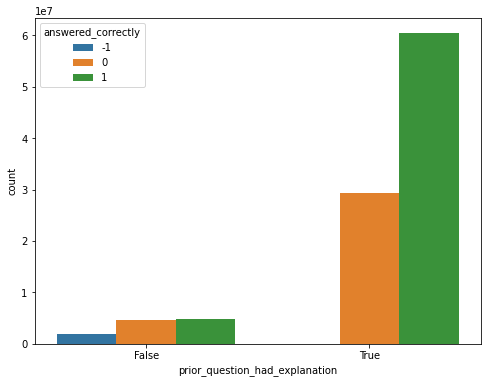

In [72]:
fig = plt.figure(figsize=(8,6))
sns.countplot(x="prior_question_had_explanation", hue="answered_correctly", data=train)

In [8]:
!wget -O questions.csv https://www.dropbox.com/s/wud61qkb2um2exk/questions.csv?dl=0

--2020-11-10 21:40:02--  https://www.dropbox.com/s/wud61qkb2um2exk/questions.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wud61qkb2um2exk/questions.csv [following]
--2020-11-10 21:40:02--  https://www.dropbox.com/s/raw/wud61qkb2um2exk/questions.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1ec691c5eb15f71a5a3f7acc97.dl.dropboxusercontent.com/cd/0/inline/BC9M4MzTbjN0R-nXRBRNugmFbxzEKyqxGMDXgmepD0OXtzWYWGWYSryZfeTU90sKmZliUCH0jtNTpPpyRITU43NLFdu8u6DqCVhepVrZDwe2tYCBFiFp5DTixgbeAkKQSxY/file# [following]
--2020-11-10 21:40:02--  https://uc1ec691c5eb15f71a5a3f7acc97.dl.dropboxusercontent.com/cd/0/inline/BC9M4MzTbjN0R-nXRBRNugmFbxzEKyqxGMDXgmepD0OXtzWYWGWYSryZfeTU90sKmZliUCH0jtNTpPpyRITU43NLFdu8u6DqCVhepVrZDw

In [56]:
questions = pd.read_csv('questions.csv')
questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


Metadata for the questions posed to users.

question_id: foreign key for the train/test content_id column, when the content type is question (0).
bundle_id: code for which questions are served together.
correct_answer: the answer to the question. Can be compared with the train user_answer column to check if the user was right.
part: the relevant section of the TOEIC test.
tags: one or more detailed tag codes for the question. The meaning of the tags will not be provided, but these codes are sufficient for clustering the questions together.

In [57]:
questions.shape

(13523, 5)

In [58]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [59]:
#  null values
questions.isnull().sum()

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

## Tags

Tags column in the question csv is for clustering the questions as written in the desc. As it may be in terms of grouping questions based off of the student's answer time or clustering them on concrete topics which students do not actually do well mostly.
The tags seem valuable to me. First, let's check if there are any question_id's without tags. As you can see, there is exactly one question_id without at least one tag. Not a big deal, but we need to keep in mind that we have to impute something here if we make features based on tags.

In [60]:
questions[questions.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


In [61]:
train.query('content_id == "10033" and answered_correctly != -1')

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
62750278,62750278,1286282597,1333688829,10033,False,1127,2,1,35000.0,True


when looking at train, we see that this question was just asked once

## Number of tags per question_id

In [62]:
questions['tag'] = questions['tags'].str.split(' ')
questions = questions.explode('tag')
questions = pd.merge(
    questions, 
    questions.groupby('question_id')['tag'].count().reset_index(), 
    on='question_id'
)
questions = questions.drop(['tag_x'], axis=1)
questions.columns = [
    'question_id', 
    'bundle_id', 
    'correct_answer', 
    'part', 
    'tags', 
    'tags_number'
]
questions = questions.drop_duplicates()


In [68]:
check = questions['tags'].str.split(' ').explode('tags').reset_index()
check = check['tags'].value_counts().reset_index()

check.columns = ['tag', 'count']
check['tag'] = check['tag'].astype(str) + '-'
check = check.sort_values(['count']).tail(40)

fig = px.bar(
    check, 
    x='count', 
    y='tag', 
    orientation='h', 
    title='Top 40 most used tags', 
    width=800,
    height=900 
)

fig.show()



In [65]:
questions

,question_id,bundle_id,correct_answer,part,tags,tags_number
0,0,0,0,1,51 131 162 38,4
4,1,1,1,1,131 36 81,3
7,2,2,0,1,131 101 162 92,4
11,3,3,0,1,131 149 162 29,4
15,4,4,3,1,131 5 162 38,4
...,...,...,...,...,...,...
30988,13518,13518,3,5,14,1
30989,13519,13519,3,5,8,1
30990,13520,13520,2,5,73,1
30991,13521,13521,0,5,125,1


In [67]:
ds = questions['tags_number'].value_counts().reset_index()
ds.columns = ['tags_number', 'count']
ds['tags_number'] = ds['tags_number'].astype(str) + '-'
ds = ds.sort_values(['tags_number'])

fig = px.bar(
    ds, 
    x='count', 
    y='tags_number', 
    orientation='h', 
    title='Number tags distribution', 
    width=800,
    height=400 
)
fig.show()

In [63]:
questions['tags'] = questions['tags'].astype(str)

In [64]:
tags = [x.split() for x in questions[questions.tags != "nan"].tags.values]
tags[:10]

[['51', '131', '162', '38'],
 ['131', '36', '81'],
 ['131', '101', '162', '92'],
 ['131', '149', '162', '29'],
 ['131', '5', '162', '38'],
 ['131', '149', '162', '81'],
 ['10', '94', '162', '92'],
 ['61', '110', '162', '29'],
 ['131', '13', '162', '92'],
 ['10', '164', '81']]

In [53]:
tags = [item for elem in tags for item in elem]
tags = set(tags)
tags = list(tags)
print(f'There are {len(tags)} different tags')

There are 188 different tags


In [54]:
questions['tag'] = questions['tags'].str.split(' ')
questions = questions.explode('tag')
questions

,question_id,bundle_id,correct_answer,part,tags,tag
0,0,0,0,1,51 131 162 38,51
0,0,0,0,1,51 131 162 38,131
0,0,0,0,1,51 131 162 38,162
0,0,0,0,1,51 131 162 38,38
1,1,1,1,1,131 36 81,131
...,...,...,...,...,...,...
13518,13518,13518,3,5,14,14
13519,13519,13519,3,5,8,8
13520,13520,13520,2,5,73,73
13521,13521,13521,0,5,125,125


## Number of correct answers per group

In [20]:
ds = questions['correct_answer'].value_counts().reset_index()
ds.columns = ['correct_answer', 'number_of_answers']
ds['correct_answer'] = ds['correct_answer'].astype(str) + '-'
ds = ds.sort_values(['number_of_answers'])

fig = px.bar(
    ds, 
    x='number_of_answers', 
    y='correct_answer', 
    orientation='h', 
    title='Number of correct answers per group', 
    width=800,
    height=300
)

fig.show()

## Amount of wrong and right per question_id

how many answers were Right and Wrong per question_id (so per content_id in train).



In [41]:
tags_list = [x.split() for x in questions.tags.values]
questions['tags'] = tags_list
questions.head()
correct = train[train.answered_correctly != -1].groupby(["content_id", 'answered_correctly'], as_index=False).size()
correct = correct.pivot(index= "content_id", columns='answered_correctly', values='size')
correct.columns = ['Wrong', 'Right']
correct = correct.fillna(0)
correct[['Wrong', 'Right']] = correct[['Wrong', 'Right']].astype(int)
questions = questions.merge(correct, left_on = "question_id", right_on = "content_id", how = "left")
questions.head()

,question_id,bundle_id,correct_answer,part,tags,tags_number,Wrong,Right
0,0,0,0,1,"[51, 131, 162, 38]",16,637,6266
1,1,1,1,1,"[131, 36, 81]",9,809,6589
2,2,2,0,1,"[131, 101, 162, 92]",16,20015,24890
3,3,3,0,1,"[131, 149, 162, 29]",16,5067,17906
4,4,4,3,1,"[131, 5, 162, 38]",16,12275,19461


## Percent correct for each Tag **


Add up all Wrong and Right answers for all questions that are labeled with a particular tag and calculate the percent correct for each tag. Please note that there is "double counting" of questions; for instance if a question has 5 tags, its answers are aggregated in the totals of each of the 5 tags.

In [22]:
%%time
tags_df = pd.DataFrame()
for x in range(len(tags)):
    df = pd.DataFrame()
    for y in range(len(questions)):
        if (tags[x] in questions.tags.values[y]):
            df = df.append(questions.iloc[y,:])

    df1 = df.agg({'Wrong': ['sum'], 'Right': ['sum']})
    df1['Total_questions'] = df1.Wrong + df1.Right
    df1['Question_ids_with_tag'] = len(df)
    df1['tag'] = tags[x]
    df1 = df1.set_index('tag')
    tags_df = tags_df.append(df1)

tags_df[['Wrong', 'Right', 'Total_questions']] = tags_df[['Wrong', 'Right', 'Total_questions']].astype(int)
tags_df['Percent_correct'] = tags_df.Right/tags_df.Total_questions
tags_df = tags_df.sort_values(by = "Percent_correct")

CPU times: user 2min 23s, sys: 32.2 ms, total: 2min 23s
Wall time: 2min 23s


In [23]:
tags_df.head()

,Wrong,Right,Total_questions,Question_ids_with_tag,Percent_correct
tag,,,,,
24,157631,98982,256613,17,0.385725
23,261611,204293,465904,11,0.438487
19,173602,136367,309969,57,0.439938
151,272267,264913,537180,16,0.493155
167,170386,170681,341067,11,0.500432


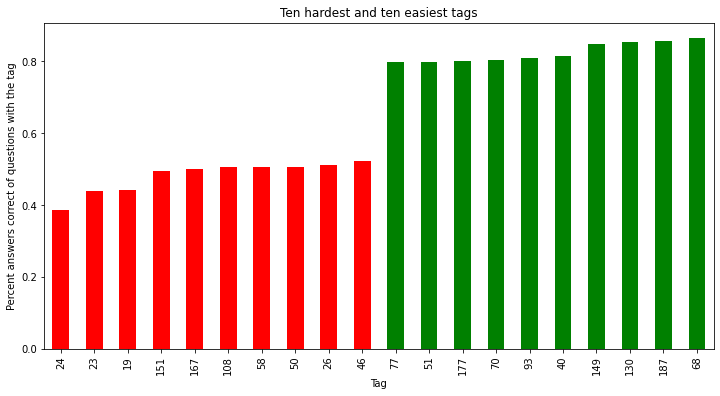

In [37]:
select_rows = list(range(0,10)) + list(range(178, len(tags_df)))
tags_select = tags_df.iloc[select_rows,4]

fig = plt.figure(figsize=(12,6))
x = tags_select.index
y = tags_select.values
clrs = ['red' if y < 0.6 else 'green' for y in tags_select.values]
tags_select.plot.bar(x, y, color=clrs)
plt.title("Ten hardest and ten easiest tags")
plt.xlabel("Tag")
plt.ylabel("Percent answers correct of questions with the tag")
plt.xticks(rotation=90)
plt.show()

However, we should also realize that the tag with the worst percent_correct only has about 250,000 answers. This a low number compared to the tags with most answers.

NameError: ignored

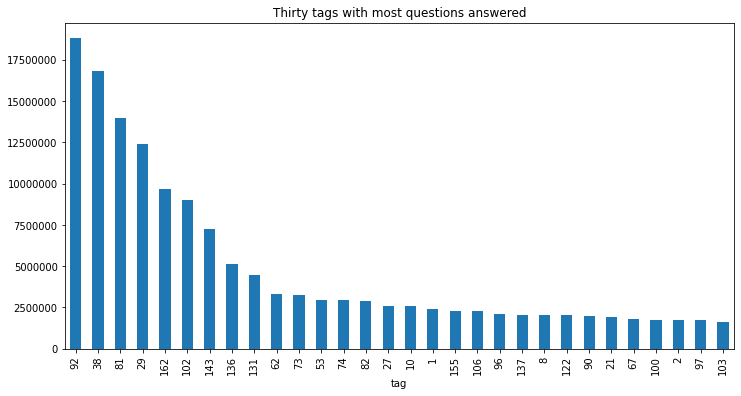

In [38]:
tags_select = tags_df.sort_values(by = "Total_questions", ascending = False).iloc[:30,:]
tags_select = tags_select["Total_questions"]

fig = plt.figure(figsize=(12,6))
ax = tags_select.plot.bar()
plt.title("Thirty tags with most questions answered")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ','))) #add thousands separator
plt.show()

Some questions have multiple tags, **does the order of the tags have any meaning.** For example, is the first tag the most important tag and should we thus focus on the first tag, or is the order random and should all tags be treated equally? As far as I know, no importance order on tags. But you can try to predict tag importance along with your answer correctness training/prediction to see if it boost the results.

## Parts : TOEIC TEST

The listening section consists of Part 1-4 (Listening Section (approx. 45 minutes, 100 questions)).

The reading section consists of Part 5-7 (Reading Section (75 minutes, 100 questions)).

In [39]:
questions.part.value_counts()

5    5511
2    1647
3    1562
4    1439
6    1212
7    1160
1     992
Name: part, dtype: int64

In [43]:
ds = questions['part'].value_counts().reset_index()
ds.columns = ['part', 'count']
ds['part'] = ds['part'].astype(str) + '-'
ds = ds.sort_values(['count'])

fig = px.bar(
    ds, 
    x='count', 
    y='part', 
    orientation='h', 
    title='Parts distribution',
    width=800,
    height=400
)

fig.show()

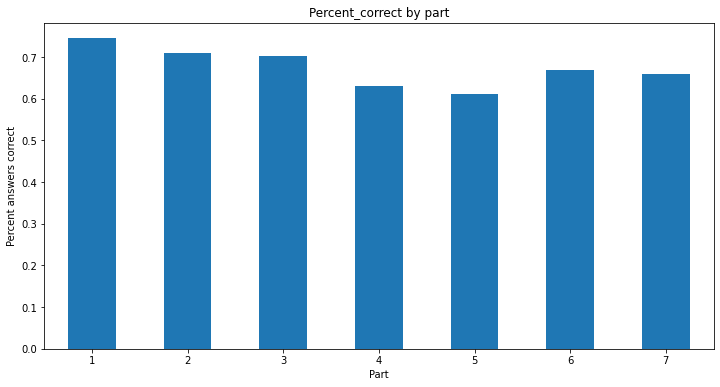

In [42]:
part = questions.groupby('part').agg({'Wrong': ['sum'], 'Right': ['sum']})
part['Percent_correct'] = part.Right/(part.Right + part.Wrong)
part = part.iloc[:,2]

fig = plt.figure(figsize=(12,6))
part.plot.bar()
plt.title("Percent_correct by part")
plt.xlabel("Part")
plt.ylabel("Percent answers correct")
plt.xticks(rotation=0)
plt.show()


# Loading Lectures Metatdata

#  Modeling